In [29]:
# Define the Phoneme class
class Phoneme:
    def __init__(self, p: str, es: bool, hu: bool):
        self.p = p 
        self.es = es
        self.hu = hu

    def __repr__(self):
        return f"(p={self.p}, es={True if self.es else False}, hu={True if self.hu else False})"


# Create p objects for each unique p
phonemes = {
    "y": Phoneme(p="y", es=False, hu=True),
    "æ": Phoneme(p="æ", es=False, hu=False),
    "ø": Phoneme(p="ø", es=False, hu=True),
    "ʁ": Phoneme(p="ʁ", es=False, hu=False),
    "ɶ": Phoneme(p="ɶ", es=False, hu=False),
    "u": Phoneme(p="u", es=True, hu=True),
    "e": Phoneme(p="e", es=True, hu=True),
    "i": Phoneme(p="i", es=True, hu=True),
    "a": Phoneme(p="a", es=True, hu=True),
    "ɛ": Phoneme(p="ɛ", es=True, hu=True),
    "ɡ": Phoneme(p="ɡ", es=True, hu=True),
    "ɔ": Phoneme(p="ɔ", es=False, hu=False),
    "p": Phoneme(p="p", es=True, hu=True),
}

# Dictionary for pairs and their associated p contrasts
pairs_phonemes = {
    ('ful', 'ful'): phonemes['u'],
    ('lys', 'lys'): phonemes['y'],
    ('mæt', 'mæt'): phonemes['æ'],
    ('kat', 'kat'): phonemes['a'],
    ('ben', 'ben'): phonemes['e'],
    ('grå', 'grå'): phonemes['ɔ'],
    ('nø', 'nø'): phonemes['ø'],
    ('rød', 'rød'): phonemes['ʁ'],
    ('møl', 'møl'): phonemes['ø'],
    ('syr', 'syr'): phonemes['y'],
    ('dør', 'dør'): phonemes['ɶ'],
    ('skæl', 'skæl'): phonemes['æ'],
    ('røre', 'røre'): phonemes['ʁ'],
    ('fuld', 'fuld'): phonemes['u'],
    ('ful', 'fyl'): phonemes['y'],
    ('syn', 'søn'): phonemes['ø'],
    ('set', 'sæt'): phonemes['æ'],
    ('kat', 'kæt'): phonemes['æ'],
    ('fisk', 'fæsk'): phonemes['æ'],
    ('lys', 'los'): phonemes['y'],
    ('ben', 'bøn'): phonemes['ø'],
    ('nø', 'nu'): phonemes['ø'],
    ('rød', 'ryd'): phonemes['y'],
    ('mølle', 'mulle'): phonemes['ø'],
    ('syd', 'sød'): phonemes['y'],
    ('tat', 'tæt'): phonemes['æ'],
    ('sø', 'su'): phonemes['ø'],
    ('væg', 'vægt'): phonemes['ɡ'],
    ('løg', 'ly'): phonemes['y'],
    ('rør', 'rær'): phonemes['æ'],
    ('rød', 'lød'): phonemes['ʁ'],
    ('fuld', 'fugl'): phonemes['u'],
    ('gul', 'guld'): phonemes['u'],
    ('sinde', 'sende'): phonemes['i'],
    ('pil', 'bil'): phonemes['p'],
    ('ven', 'pen'): phonemes['p'],
    ('lidt', 'let'): phonemes['ɛ'],
    ('før', 'fær'): phonemes['æ']
}

# print(f"Total pairs: {len(pairs_phonemes)}")

# for pair, p in pairs_phonemes.items():
#     print(f"{pair} : {p}")

print(pairs_phonemes[("løg", "ly")])

(p=y, es=False, hu=True)


In [30]:
from typing import List

class Response:
    def __init__(self, is_correct: bool, word1: str, word2: str):
        self.is_correct = is_correct
        self.word1 = word1
        self.word2 = word2
        self.phoneme = pairs_phonemes[(word1, word2)]

    def __repr__(self):
        return (
            f"Response(isCorrect={self.is_correct}, "
            f"word1='{self.word1}', word2='{self.word2}')"
        )


# Class for participant data
class ParticipantData:
    def __init__(self, participant_id: str, language: str):
        self.id = participant_id
        self.language = language
        self.responses: List[Response] = []  # Initialize as an empty list

    def __repr__(self):
        return (
            f"ParticipantData(id={self.id}, language='{self.language}', "
            f"responses={self.responses})"
        )

In [31]:
import json
import pandas as pd

# Load the data from Excel
df = pd.read_excel("data.xlsx")

# Create a list to hold all participants' data
participants: List[ParticipantData] = []

# Process each row in the dataframe
for _, row in df.iterrows():
    # Extract participant-level data
    participant_id = row["Participant ID"]
    language = row["L1"]
    responses_json = row["Data"]

    responses_data = json.loads(responses_json)
    participant = ParticipantData(participant_id, language)

    # Add responses to the participant
    for response in responses_data:
        if response["word1"] != "sinde":
            participant.responses.append(
                Response(
                    is_correct=response["isCorrect"],
                    word1=response["word1"],
                    word2=response["word2"],
                )
            )
    participants.append(participant)

# Accessing the first response of the first participant
print(participants[0].responses[0].phoneme, participants[0].responses[0])

(p=ʁ, es=False, hu=False) Response(isCorrect=True, word1='rød', word2='rød')


In [32]:
from collections import defaultdict

accuracy_es: List[int] = []
accuracy_hu: List[int] = []
accuracy_dk: List[int] = []

# Function to calculate accuracy for each participant
def calculate_participant_accuracy(participant: ParticipantData):
    total_trials = 37
    correct_trials = sum(1 for p in participant.responses if p.is_correct)
    return correct_trials / total_trials if total_trials > 0 else 0

print (calculate_participant_accuracy(participants[0]))

0.9459459459459459


In [43]:
from collections import defaultdict
from typing import Dict, List

language_accuracies: Dict[str, List[float]] = defaultdict(list)

for participant in participants:
    accuracy = calculate_participant_accuracy(participant)
    language_accuracies[participant.language].append(accuracy)

average_accuracies = {
    language: sum(accuracies) / len(accuracies) if accuracies else 0
    for language, accuracies in language_accuracies.items()
}

for language, avg_accuracy in average_accuracies.items():
    print(f"Language: {language}, Average Accuracy: {avg_accuracy:.2%}")

print (language_accuracies)

for language, accuracies in language_accuracies.items():
    print(f"Language: {language}, Number of Accuracies: {len(accuracies)}")

Language: Danish, Average Accuracy: 94.26%
Language: Hungarian, Average Accuracy: 75.38%
Language: Spanish, Average Accuracy: 74.87%
defaultdict(<class 'list'>, {'Danish': [0.9459459459459459, 0.8918918918918919, 0.972972972972973, 0.8918918918918919, 0.972972972972973, 0.918918918918919, 1.0, 0.9459459459459459], 'Hungarian': [0.7837837837837838, 0.8108108108108109, 0.7837837837837838, 0.8108108108108109, 0.7297297297297297, 0.7837837837837838, 0.7027027027027027, 0.7567567567567568, 0.8648648648648649, 0.7567567567567568, 0.7297297297297297, 0.7297297297297297, 0.7567567567567568, 0.7027027027027027, 0.7297297297297297, 0.7567567567567568, 0.7297297297297297, 0.8108108108108109, 0.7567567567567568, 0.6756756756756757, 0.7297297297297297, 0.7027027027027027, 0.6486486486486487, 0.8108108108108109, 0.8108108108108109, 0.7837837837837838, 0.7027027027027027], 'Spanish': [0.7297297297297297, 0.5945945945945946, 0.8378378378378378, 0.8378378378378378, 0.6756756756756757, 0.891891891891891

## Data visualizations

defaultdict(<class 'list'>, {'Danish': [0.9459459459459459, 0.8918918918918919, 0.972972972972973, 0.8918918918918919, 0.972972972972973, 0.918918918918919, 1.0, 0.9459459459459459], 'Hungarian': [0.7837837837837838, 0.8108108108108109, 0.7837837837837838, 0.8108108108108109, 0.7297297297297297, 0.7837837837837838, 0.7027027027027027, 0.7567567567567568, 0.8648648648648649, 0.7567567567567568, 0.7297297297297297, 0.7297297297297297, 0.7567567567567568, 0.7027027027027027, 0.7297297297297297, 0.7567567567567568, 0.7297297297297297, 0.8108108108108109, 0.7567567567567568, 0.6756756756756757, 0.7297297297297297, 0.7027027027027027, 0.6486486486486487, 0.8108108108108109, 0.8108108108108109, 0.7837837837837838, 0.7027027027027027], 'Spanish': [0.7297297297297297, 0.5945945945945946, 0.8378378378378378, 0.8378378378378378, 0.6756756756756757, 0.8918918918918919, 0.7837837837837838, 0.7837837837837838, 0.8378378378378378, 0.6486486486486487, 0.5945945945945946, 0.8378378378378378, 0.64864864

C:\Users\Kaiusz\AppData\Local\Temp\ipykernel_33444\3603946052.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Kaiusz\AppData\Local\Temp\ipykernel_33444\3603946052.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


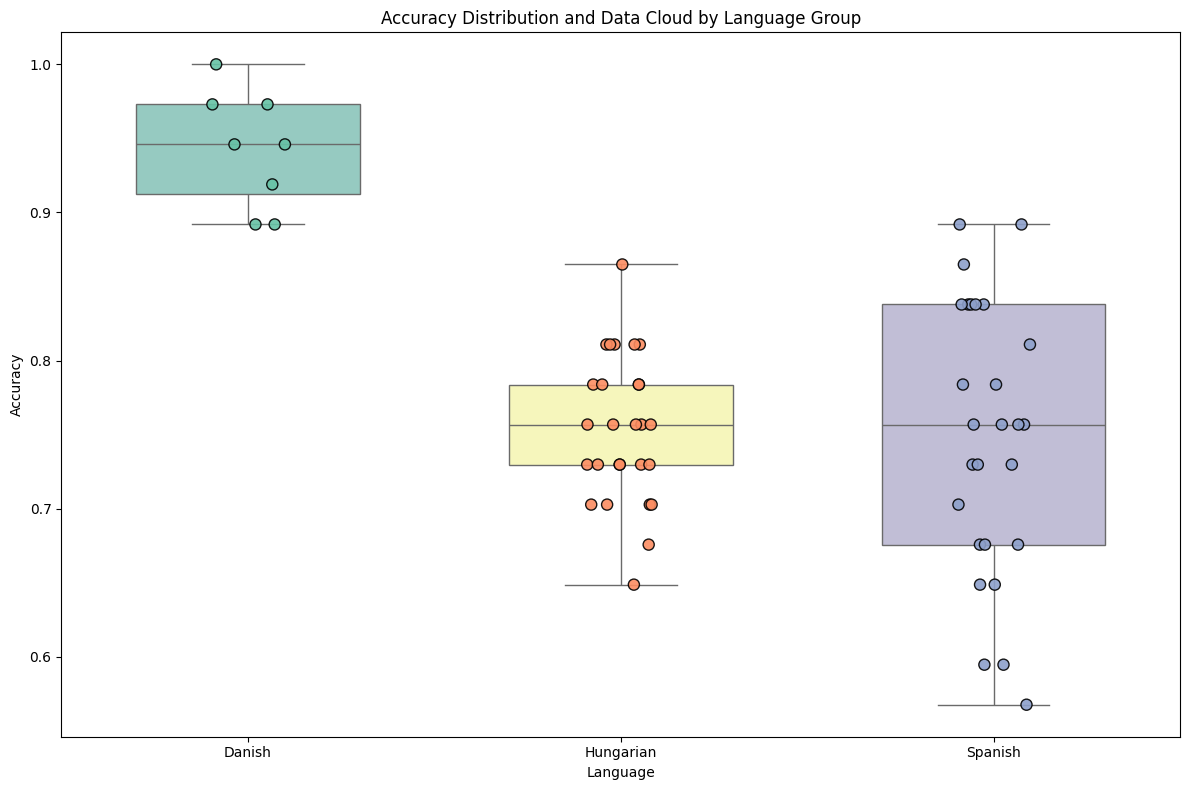

In [34]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import Dict, List

# Initialize the language_accuracies dictionary as defaultdict
language_accuracies: Dict[str, List[float]] = defaultdict(list)

# Example of a participant data structure
# Assuming 'calculate_participant_accuracy' returns accuracy for a participant
for participant in participants:
    accuracy = calculate_participant_accuracy(participant)
    language_accuracies[participant.language].append(accuracy)

# If this works correctly, print the dictionary to check the structure
print(language_accuracies)

# Prepare the data for plotting
data = {
    "Language": [],
    "Accuracy": [],
}

# Flatten the data into the format needed for seaborn
for language, accuracies in language_accuracies.items():
    data["Language"].extend([language] * len(accuracies))
    data["Accuracy"].extend(accuracies)

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Language",
    y="Accuracy",
    data=df,
    palette="Set3",
    showfliers=False,
    width=0.6,  # Make boxplots slightly narrower to enhance distinction
)

# Overlay the data cloud with a stripplot
sns.stripplot(
    x="Language",
    y="Accuracy",
    data=df,
    jitter=True,
    size=8,  # Increase dot size
    alpha=0.9,  # Make dots less transparent
    palette="Set2",
    edgecolor="black",  # Add a black edge for better visibility
    linewidth=1,  # Slightly thicker edges
)

# Customize the plot
plt.title("Accuracy Distribution and Data Cloud by Language Group")
plt.xlabel("Language")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

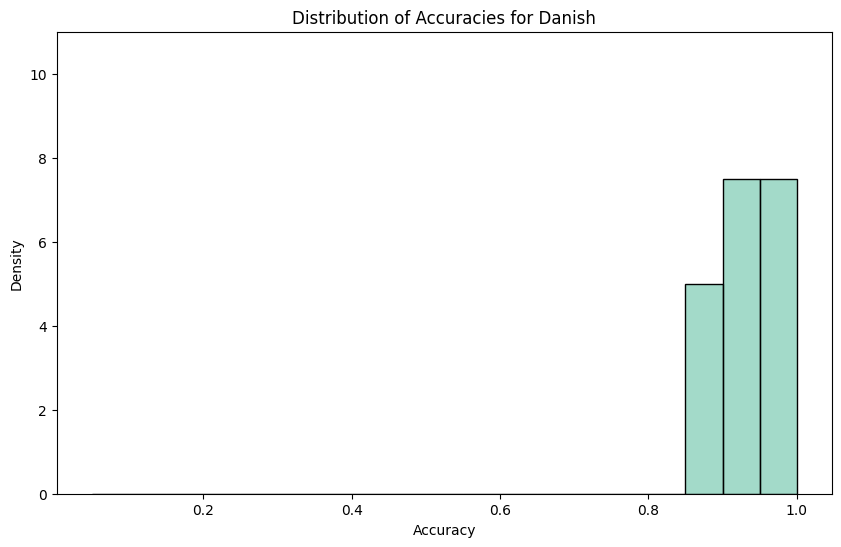

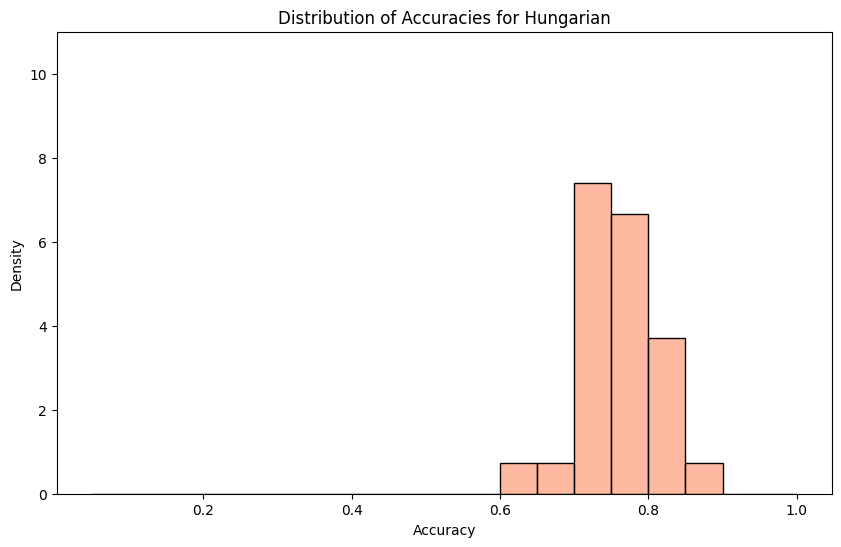

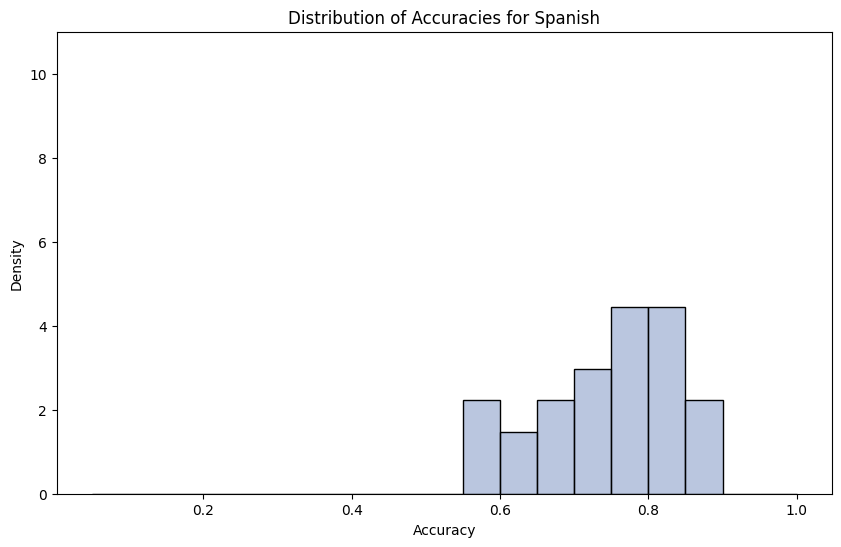

In [35]:
import numpy as np


# Define color palette
palette = sns.color_palette("Set2", len(language_accuracies))

# Plot histograms with KDEs for each language
for idx, (language, color) in enumerate(zip(language_accuracies.keys(), palette)):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        df[df["Language"] == language]["Accuracy"],
        kde=False,
        color=color,
        bins=np.arange(0.05, 1.05, 0.05),
        stat="density",
        edgecolor="black",
        alpha=0.6
    )
    plt.title(f"Distribution of Accuracies for {language}")
    plt.xlabel("Accuracy")
    plt.ylabel("Density")
    plt.ylim(0,11)
    plt.show()

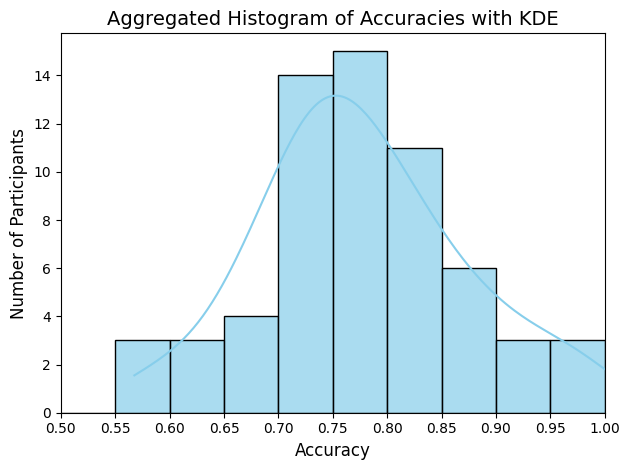

In [36]:
# Aggregated histogram of accuracies
sns.histplot(
    df["Accuracy"],  # Use the entire Accuracy column for the aggregated histogram
    kde=True,  # Overlay KDE for the distribution curve
    bins=np.arange(0.5, 1.05, 0.05),  # Bin range and size
    stat="count",  # Show participant counts
    color="skyblue",  # Choose a color for the histogram
    edgecolor="black",  # Add edge color for better visibility
    alpha=0.7  # Slight transparency for aesthetics
)

# Add labels and title
plt.title("Aggregated Histogram of Accuracies with KDE", fontsize=14)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xlim(0.5, 1)  # Set x-axis range
plt.xticks(np.arange(0.5, 1.05, 0.05))  # Tick marks at 0.05 intervals
plt.tight_layout()
plt.show()

In [37]:
print(df.shape)

(62, 2)


C:\Users\Kaiusz\AppData\Local\Temp\ipykernel_33444\2988716820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


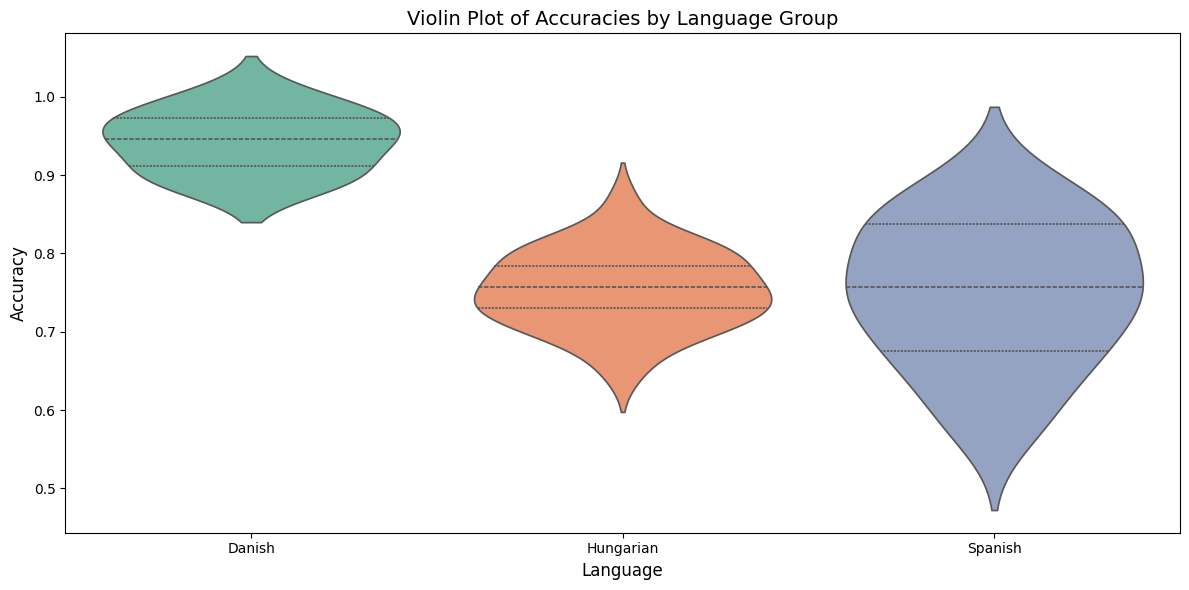

In [38]:
# Plotting the variances by group using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Language", 
    y="Accuracy", 
    data=df, 
    inner="quartile",  # Show quartiles inside the violins
    palette="Set2"
)
plt.title("Violin Plot of Accuracies by Language Group", fontsize=14)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Tests

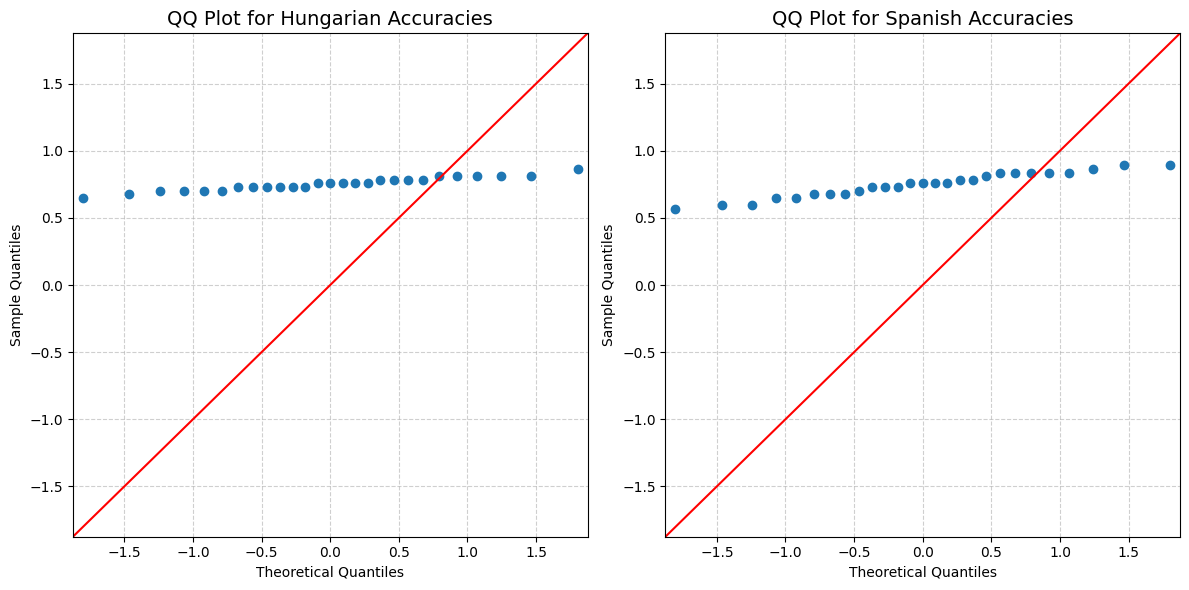

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

hungarian_accuracies = df[df["Language"] == "Hungarian"]["Accuracy"]
spanish_accuracies = df[df["Language"] == "Spanish"]["Accuracy"]

# Create a figure with subplots for two QQ plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)  # 1 row, 2 columns

# Hungarian QQ plot
sm.qqplot(hungarian_accuracies, line='45', ax=axes[0])
axes[0].set_title("QQ Plot for Hungarian Accuracies", fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Spanish QQ plot
sm.qqplot(spanish_accuracies, line='45', ax=axes[1])
axes[1].set_title("QQ Plot for Spanish Accuracies", fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [41]:
from scipy import stats

# Perform a one-tailed Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(
    hungarian_accuracies,
    spanish_accuracies,
    alternative='greater'  # One-tailed test: Hungarian > Spanish
)

# Output the results
print("Mann-Whitney U Test (One-Tailed: Hungarian > Spanish):")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. Hungarian participants have significantly higher accuracies than Spanish participants.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in accuracies (Hungarian is not greater than Spanish).")

Mann-Whitney U Test (One-Tailed: Hungarian > Spanish):
U-Statistic: 362.5
P-Value: 0.5173707031136607
Fail to reject the null hypothesis. There is no significant difference in accuracies (Hungarian is not greater than Spanish).


In [42]:
from collections import defaultdict
import pandas as pd

# Initialize storage for phoneme accuracy and word pairs
phoneme_accuracy = defaultdict(lambda: defaultdict(list))
phoneme_word_pairs = defaultdict(list)  # To store word pairs for each phoneme

# Iterate over participants and their responses
for participant in participants:
    for response in participant.responses:
        wordpair = (response.word1, response.word2)
        phoneme = response.phoneme.p
        phoneme_accuracy[phoneme][participant.language].append(response.is_correct)
        phoneme_word_pairs[phoneme].append(wordpair)

# Calculate average accuracy and standard deviation for each phoneme per language
table_data = defaultdict(dict)  # Stores data in a row-wise structure

for phoneme, language_data in phoneme_accuracy.items():
    for language, accuracies in language_data.items():
        avg_accuracy = round(sum(accuracies) / len(accuracies) if accuracies else 0, 2)
        std_dev = round(pd.Series(accuracies).std() if accuracies else 0, 2)
        table_data[phoneme][f"{language} Accuracy"] = avg_accuracy
        table_data[phoneme][f"{language} Std"] = std_dev

# Convert to a pandas DataFrame
df = pd.DataFrame.from_dict(table_data, orient="index").fillna(0)

# Add word pairs to the DataFrame (remove duplicates)
df["Word Pair"] = df.index.map(
    lambda phoneme: ", ".join(
        [f"({pair[0]}, {pair[1]})" for pair in set(phoneme_word_pairs[phoneme])]
    )
)

# Rename columns for clarity
df.columns.name = "Metric"
df.index.name = "Phoneme"

# Reorder columns to group accuracy and std for each language together
columns = ["Word Pair"] + sorted(
    [col for col in df.columns if col != "Word Pair"], key=lambda x: x.split()[0]
)
df = df[columns]

# Print the table
print(df)

Metric                                           Word Pair  Danish Accuracy  \
Phoneme                                                                       
ʁ                     (rød, lød), (røre, røre), (rød, rød)             1.00   
æ        (skæl, skæl), (kat, kæt), (set, sæt), (før, fæ...             0.95   
y        (syd, sød), (lys, los), (ful, fyl), (løg, ly),...             0.95   
ɶ                                               (dør, dør)             1.00   
ø        (syn, søn), (nø, nø), (møl, møl), (ben, bøn), ...             0.93   
p                                   (ven, pen), (pil, bil)             0.88   
e                                               (ben, ben)             1.00   
u        (fuld, fugl), (gul, guld), (ful, ful), (fuld, ...             0.91   
a                                               (kat, kat)             1.00   
ɛ                                              (lidt, let)             0.75   
ɔ                                               (grå